In [10]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model
import os
import seaborn as sns
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to the following size
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/chest_xray/chest_xray/train'
valid_path = '/content/drive/MyDrive/chest_xray/chest_xray/test'

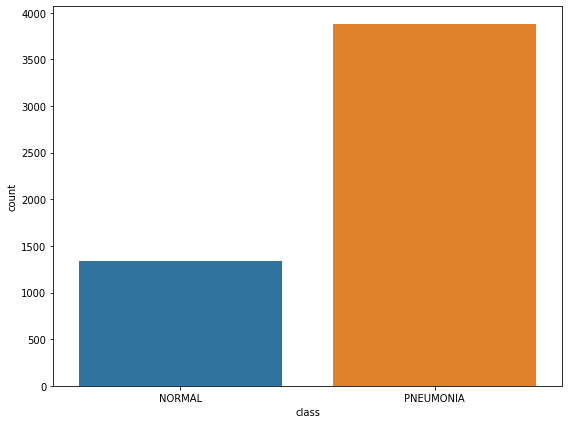

In [11]:
DF = pd.DataFrame(columns=['class','count'])
DF['class']=pd.Series([os.listdir(train_path)[x] for x in range(0,2)])
DF['count']=pd.Series([len(os.listdir(os.path.join(train_path,os.listdir(train_path)[x]))) for x in range(0,2)])
plt.figure(figsize=(8,6))
g=sns.barplot(x='class', y='count',data=DF)
g.set_xticklabels(g.get_xticklabels(), rotation=0)
plt.tight_layout()

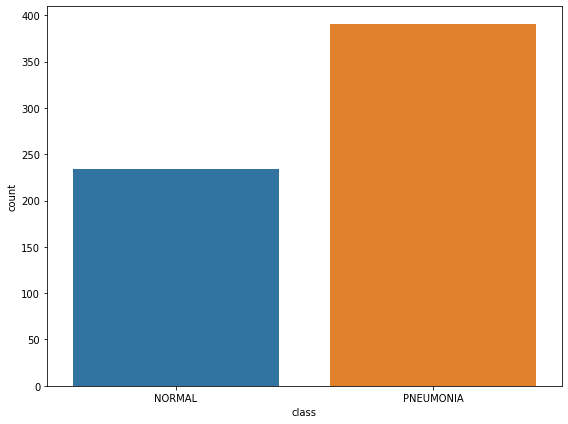

In [12]:
DF = pd.DataFrame(columns=['class','count'])
DF['class']=pd.Series([os.listdir(valid_path)[x] for x in range(0,2)])
DF['count']=pd.Series([len(os.listdir(os.path.join(valid_path,os.listdir(valid_path)[x]))) for x in range(0,2)])
plt.figure(figsize=(8,6))
g=sns.barplot(x='class', y='count',data=DF)
g.set_xticklabels(g.get_xticklabels(), rotation=0)
plt.tight_layout()

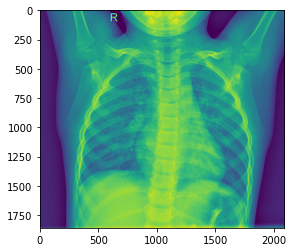

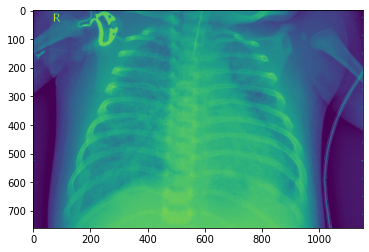

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img1 = mpimg.imread('/content/drive/MyDrive/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
img2 = mpimg.imread('/content/drive/MyDrive/chest_xray/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
imgplot = plt.imshow(img1)
plt.show()
imgplot = plt.imshow(img2)
plt.show()

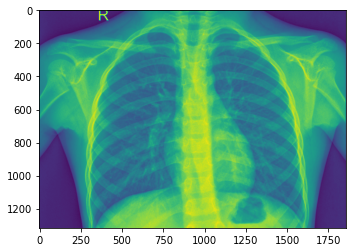

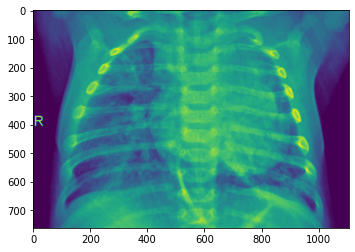

In [ ]:
img1 = mpimg.imread('/content/drive/MyDrive/chest_xray/chest_xray/test/NORMAL/IM-0001-0001.jpeg')
img2 = mpimg.imread('/content/drive/MyDrive/chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg')
imgplot = plt.imshow(img1)
plt.show()
imgplot = plt.imshow(img2)
plt.show()

In [4]:
# Import the Vgg 19 library , use imagenet weights and use our input and fully connected output layer


vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [5]:
# use the exsiting weights
for layer in vgg.layers:
    layer.trainable = False

In [6]:
 # Fetch the number of output classes
folders = glob('/content/drive/MyDrive/chest_xray/chest_xray/chest_xray/train*')

In [7]:
x = Flatten()(vgg.output)


In [8]:
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/chest_xray/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/chest_xray/chest_xray/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 624 images belonging to 2 classes.


In [14]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
  
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
163/163 [==============================] - 1258s 7s/step - loss: 0.2617 - accuracy: 0.9064 - val_loss: 0.4196 - val_accuracy: 0.8510
Epoch 2/5
163/163 [==============================] - 151s 928ms/step - loss: 0.1287 - accuracy: 0.9502 - val_loss: 0.3521 - val_accuracy: 0.8862
Epoch 3/5
163/163 [==============================] - 151s 925ms/step - loss: 0.1115 - accuracy: 0.9595 - val_loss: 0.3000 - val_accuracy: 0.9006
Epoch 4/5
163/163 [==============================] - 147s 903ms/step - loss: 0.1139 - accuracy: 0.9576 - val_loss: 0.3213 - val_accuracy: 0.9022
Epoch 5/5
163/163 [==============================] - 147s 902ms/step - loss: 0.1003 - accuracy: 0.9638 - val_loss: 0.2536 - val_accuracy: 0.9183


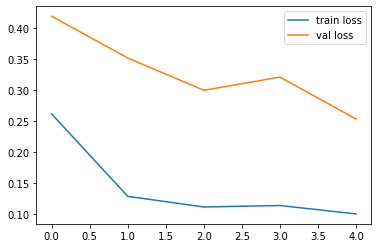

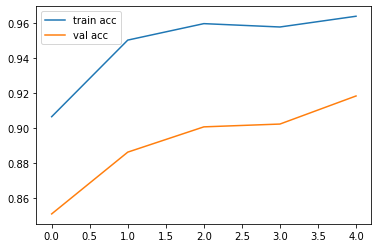

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
model.save('model_vgg19.h5')

In [17]:
from keras.models import load_model
from keras.preprocessing import image


In [18]:
model = load_model('model_vgg19.h5')

In [23]:
# predict with val dataset
img = image.load_img('/content/drive/MyDrive/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg',target_size=(224,224,3))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
classes = model.predict(x)

In [24]:
classes

array([[1., 0.]], dtype=float32)